<a href="https://colab.research.google.com/github/AzraSaf/NutriSense/blob/main/irushi_work/colab_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from zipfile import ZipFile
import os

# Path for uploaded zip file
uploaded_zip_path = '/content/Potassium BananaZ.zip'  # Replace with the uploaded file name
extracted_folder_path = '/content/leaf_images'  # Folder to extract the images

# Extract the zip file
os.makedirs(extracted_folder_path, exist_ok=True)
with ZipFile(uploaded_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# Check extracted files
print(f"Files extracted to {extracted_folder_path}:")
print(os.listdir(extracted_folder_path))


Files extracted to /content/leaf_images:
['Potassium Banana']


In [3]:
import cv2
import os

# Path for preprocessed images
preprocessed_folder = '/content/leaf_images/preprocessed'
os.makedirs(preprocessed_folder, exist_ok=True)

# Walk through all subfolders and process images
for root, dirs, files in os.walk('/content/leaf_images'):
    for filename in files:
        file_path = os.path.join(root, filename)
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img = cv2.imread(file_path)
            if img is not None:
                # Resize the image to 256x256
                processed_img = cv2.resize(img, (256, 256))
                # Save preprocessed image
                output_path = os.path.join(preprocessed_folder, filename)
                cv2.imwrite(output_path, processed_img)
                print(f"Preprocessed and saved: {output_path}")
            else:
                print(f"Failed to process image: {filename}")
        else:
            print(f"Skipped non-image file: {filename}")

# Confirm preprocessed folder contents
print(f"Preprocessed images saved in: {preprocessed_folder}")
print(os.listdir(preprocessed_folder))


Preprocessed and saved: /content/leaf_images/preprocessed/k501.jpg
Preprocessed and saved: /content/leaf_images/preprocessed/k_52.jpg
Preprocessed and saved: /content/leaf_images/preprocessed/k_369.jpg
Preprocessed and saved: /content/leaf_images/preprocessed/k712.jpg
Preprocessed and saved: /content/leaf_images/preprocessed/k46.jpg
Preprocessed and saved: /content/leaf_images/preprocessed/k_241.jpg
Preprocessed and saved: /content/leaf_images/preprocessed/k_194.jpg
Preprocessed and saved: /content/leaf_images/preprocessed/k_372.jpg
Preprocessed and saved: /content/leaf_images/preprocessed/k831.jpg
Preprocessed and saved: /content/leaf_images/preprocessed/k647.jpg
Preprocessed and saved: /content/leaf_images/preprocessed/k56.jpg
Preprocessed and saved: /content/leaf_images/preprocessed/k653.jpg
Preprocessed and saved: /content/leaf_images/preprocessed/k527.jpg
Preprocessed and saved: /content/leaf_images/preprocessed/k665.jpg
Preprocessed and saved: /content/leaf_images/preprocessed/k7

In [4]:
import os
print(os.listdir('/content/leaf_images/preprocessed'))


['k501.jpg', 'k_52.jpg', 'k_369.jpg', 'k712.jpg', 'k46.jpg', 'k_241.jpg', 'k_194.jpg', 'k_372.jpg', 'k831.jpg', 'k647.jpg', 'k56.jpg', 'k653.jpg', 'k527.jpg', 'k665.jpg', 'k71.jpg', 'k791.jpg', 'k_280.jpg', 'k631.jpg', 'k_237.jpg', 'k177.jpg', 'k299.jpg', 'k148.jpg', 'k807.jpg', 'k692.jpg', 'k_248.jpg', 'k442.jpg', 'k369.jpg', 'k156.jpg', 'k_58.jpg', 'k_349.jpg', 'k58.jpg', 'k785.jpg', 'k705.jpg', 'k_358.jpg', 'k_315.jpg', 'k119.jpg', 'k251.jpg', 'k35.jpg', 'k_17.jpg', 'k455.jpg', 'k470.jpg', 'k270.jpg', 'k318.jpg', 'k498.jpg', 'k384.jpg', 'k420.jpg', 'k629.jpg', 'k230.jpg', 'k516.jpg', 'k768.jpg', 'k596.jpg', 'k703.jpg', 'k52.jpg', 'k774.jpg', 'k748.jpg', 'k391.jpg', 'k110.jpg', 'k440.jpg', 'k633.jpg', 'k668.jpg', 'k562.jpg', 'k315.jpg', 'k73.jpg', 'k657.jpg', 'k264.jpg', 'k424.jpg', 'k_95.jpg', 'k685.jpg', 'k416.jpg', 'k750.jpg', 'k261.jpg', 'k827.jpg', 'k199.jpg', 'k794.jpg', 'k_328.jpg', 'k72.jpg', 'k676.jpg', 'k728.jpg', 'k715.jpg', 'k375.jpg', 'k31.jpg', 'k803.jpg', 'k306.jpg', '

In [5]:
import cv2
import pandas as pd
import os

# Path to the preprocessed images folder
image_folder_path = '/content/leaf_images/preprocessed'

# Create an empty list to store feature rows
feature_rows = []

# Define a function to calculate greenish percentage
def calculate_greenishness(image):
    """
    Calculate the percentage of green pixels in the given image.
    """
    # Convert the image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the range for green color in HSV
    lower_green = (36, 25, 25)
    upper_green = (86, 255, 255)

    # Create a mask for green areas
    green_mask = cv2.inRange(hsv_image, lower_green, upper_green)

    # Calculate the percentage of green pixels
    green_pixels = cv2.countNonZero(green_mask)
    total_pixels = image.shape[0] * image.shape[1]
    green_percentage = (green_pixels / total_pixels) * 100

    return green_percentage

# Process each image in the preprocessed folder
for filename in os.listdir(image_folder_path):
    file_path = os.path.join(image_folder_path, filename)

    # Check if the file is an image
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Read the image
        img = cv2.imread(file_path)

        # Check if the image was read correctly
        if img is not None:
            # Calculate the greenish percentage
            green_percentage = calculate_greenishness(img)

            # Add the result to the list
            feature_rows.append({'Image': filename, 'Greenish_Percentage': green_percentage})
        else:
            print(f"Could not read image: {filename}")
    else:
        print(f"Skipped non-image file: {filename}")

# Create a DataFrame from the list of feature rows
features_df = pd.DataFrame(feature_rows)

# Save the features to a CSV file
output_csv_path = '/content/greenishness_features.csv'
features_df.to_csv(output_csv_path, index=False)

print(f"Greenish percentage extraction complete. Results saved to {output_csv_path}")


Greenish percentage extraction complete. Results saved to /content/greenishness_features.csv


In [6]:
import os
import cv2
import pandas as pd

# Define the folder where the preprocessed images are located
image_folder_path = '/content/leaf_images/preprocessed'

# Create an empty DataFrame to store the features
features_df = pd.DataFrame(columns=['Image', 'Greenish_Percentage', 'Damaged_Percentage'])

# Function to calculate greenishness percentage
def calculate_greenishness(image):
    # Convert the image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the range for green color in HSV
    lower_green = (35, 40, 40)
    upper_green = (85, 255, 255)

    # Create a mask for green areas
    green_mask = cv2.inRange(hsv_image, lower_green, upper_green)

    # Calculate the percentage of green pixels
    green_percentage = (cv2.countNonZero(green_mask) / green_mask.size) * 100
    return green_percentage

# Function to calculate the damaged area percentage
def calculate_damaged_area(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a binary threshold to detect damaged areas (assuming darker regions indicate damage)
    _, binary_image = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY_INV)

    # Calculate the percentage of damaged pixels
    damaged_percentage = (cv2.countNonZero(binary_image) / binary_image.size) * 100
    return damaged_percentage

# Process each image in the preprocessed folder
for filename in os.listdir(image_folder_path):
    file_path = os.path.join(image_folder_path, filename)

    # Skip hidden/system files like .DS_Store or __MACOSX
    if filename.startswith('.') or '._' in filename:
        continue

    # Check if the file has a valid image extension
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Read the image
        img = cv2.imread(file_path)

        # Check if the image was read correctly
        if img is not None:
            # Calculate the greenish percentage and damaged percentage
            green_percentage = calculate_greenishness(img)
            damaged_percentage = calculate_damaged_area(img)

            # Create a DataFrame for the current image
            temp_df = pd.DataFrame([{'Image': filename, 'Greenish_Percentage': green_percentage,
                                     'Damaged_Percentage': damaged_percentage}])

            # Concatenate the current row to the features DataFrame
            features_df = pd.concat([features_df, temp_df], ignore_index=True)
        else:
            print(f"Could not read image: {filename}")
    else:
        print(f"Skipped non-image file: {filename} or already processed")

# Save the updated features to a CSV file
output_csv_path = '/content/greenishness_features.csv'
features_df.to_csv(output_csv_path, index=False)

print(f"Damaged area percentage extraction complete. Results saved to {output_csv_path}")


<ipython-input-6-abf7177234c1>:63: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  features_df = pd.concat([features_df, temp_df], ignore_index=True)


Damaged area percentage extraction complete. Results saved to /content/greenishness_features.csv


In [7]:
import os
import cv2
import numpy as np
import pandas as pd

def calculate_edge_density(image):
    """
    Calculates the density of edges in the image using Canny Edge Detection.

    Args:
        image (numpy array): The input image (BGR format).

    Returns:
        float: The percentage of the image area covered by edges.
    """
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray_image, threshold1=50, threshold2=150)

    # Calculate the edge density (percentage of pixels that are edges)
    total_pixels = edges.size
    edge_pixels = np.sum(edges > 0)
    edge_density = (edge_pixels / total_pixels) * 100

    return edge_density

# Define the folder where the preprocessed images are located
image_folder_path = '/content/leaf_images/preprocessed'
csv_file_path = '/content/greenishness_features.csv'

# Load the existing CSV into a DataFrame
features_df = pd.read_csv(csv_file_path)

# Process each image in the preprocessed folder
for filename in os.listdir(image_folder_path):
    file_path = os.path.join(image_folder_path, filename)

    # Skip hidden/system files like .DS_Store or __MACOSX
    if filename.startswith('.') or '._' in filename:
        continue

    # Check if the file has a valid image extension
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Read the image
        img = cv2.imread(file_path)

        # Check if the image was read correctly
        if img is not None:
            # Calculate edge density
            edge_density = calculate_edge_density(img)

            # Append the edge density to the corresponding row in the DataFrame
            features_df.loc[features_df['Image'] == filename, 'Edge_Density'] = edge_density
        else:
            print(f"Could not read image: {filename}")
    else:
        print(f"Skipped non-image file: {filename}")

# Save the updated DataFrame back to the CSV
features_df.to_csv(csv_file_path, index=False)

print(f"Edge detection metrics added and saved to {csv_file_path}.")


Edge detection metrics added and saved to /content/greenishness_features.csv.


In [8]:
import os
import cv2
import numpy as np
import pandas as pd

def calculate_edge_density(image):
    """
    Calculates the density of edges in the image using Canny Edge Detection.

    Args:
        image (numpy array): The input image (BGR format).

    Returns:
        float: The percentage of the image area covered by edges.
    """
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray_image, threshold1=50, threshold2=150)

    # Calculate the edge density (percentage of pixels that are edges)
    total_pixels = edges.size
    edge_pixels = np.sum(edges > 0)
    edge_density = (edge_pixels / total_pixels) * 100

    return edge_density

# Define the folder where the preprocessed images are located
image_folder_path = '/content/leaf_images/preprocessed'
csv_file_path = '/content/greenishness_features.csv'

# Load the existing CSV into a DataFrame (or create a new one if it doesn't exist)
if os.path.exists(csv_file_path):
    features_df = pd.read_csv(csv_file_path)
else:
    features_df = pd.DataFrame(columns=['Image', 'Greenish_Percentage', 'Damaged_Percentage', 'Edge_Density'])

# Process each image in the preprocessed folder
for filename in os.listdir(image_folder_path):
    file_path = os.path.join(image_folder_path, filename)

    # Skip hidden/system files like .DS_Store or __MACOSX
    if filename.startswith('.') or '._' in filename:
        continue

    # Check if the file has a valid image extension
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Read the image
        img = cv2.imread(file_path)

        # Check if the image was read correctly
        if img is not None:
            # Calculate edge density
            edge_density = calculate_edge_density(img)

            # If the image is already in the DataFrame, update its edge density
            if filename in features_df['Image'].values:
                features_df.loc[features_df['Image'] == filename, 'Edge_Density'] = edge_density
            else:
                # If the image isn't in the DataFrame, create a new row
                new_row = pd.DataFrame([[filename, None, None, edge_density]], columns=['Image', 'Greenish_Percentage', 'Damaged_Percentage', 'Edge_Density'])
                features_df = pd.concat([features_df, new_row], ignore_index=True)

        else:
            print(f"Could not read image: {filename}")
    else:
        print(f"Skipped non-image file: {filename}")

# Save the updated DataFrame back to the CSV
features_df.to_csv(csv_file_path, index=False)

print(f"Edge detection metrics added and saved to {csv_file_path}.")


Edge detection metrics added and saved to /content/greenishness_features.csv.


In [9]:
import os
import cv2
import numpy as np
import pandas as pd

def calculate_edge_density(image):
    """
    Calculates the density of edges in the image using Canny Edge Detection.

    Args:
        image (numpy array): The input image (BGR format).

    Returns:
        float: The percentage of the image area covered by edges.
    """
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray_image, threshold1=50, threshold2=150)

    # Calculate the edge density (percentage of pixels that are edges)
    total_pixels = edges.size
    edge_pixels = np.sum(edges > 0)
    edge_density = (edge_pixels / total_pixels) * 100

    return edge_density

def calculate_greenishness(image):
    """
    Calculates the percentage of greenish area in the image.

    Args:
        image (numpy array): The input image (BGR format).

    Returns:
        float: The percentage of the image area that is greenish.
    """
    # Convert the image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the range for green color in HSV
    lower_green = (35, 40, 40)
    upper_green = (85, 255, 255)

    # Create a mask for green areas
    green_mask = cv2.inRange(hsv_image, lower_green, upper_green)

    # Calculate the percentage of green pixels
    green_percentage = (cv2.countNonZero(green_mask) / green_mask.size) * 100
    return green_percentage

def calculate_damaged_area(image):
    """
    Calculates the percentage of damaged area in the image.

    Args:
        image (numpy array): The input image (BGR format).

    Returns:
        float: The percentage of the image area that is damaged.
    """
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a binary threshold to detect damaged areas (assuming darker regions indicate damage)
    _, binary_image = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY_INV)

    # Calculate the percentage of damaged pixels
    damaged_percentage = (cv2.countNonZero(binary_image) / binary_image.size) * 100
    return damaged_percentage

# Define the folder where the preprocessed images are located
image_folder_path = '/content/leaf_images/preprocessed'
csv_file_path = '/content/greenishness_features.csv'

# Load the existing CSV into a DataFrame (or create a new one if it doesn't exist)
if os.path.exists(csv_file_path):
    features_df = pd.read_csv(csv_file_path)
else:
    features_df = pd.DataFrame(columns=['Image', 'Greenish_Percentage', 'Damaged_Percentage', 'Edge_Density', 'Green_Damaged_Ratio'])

# Process each image in the preprocessed folder
for filename in os.listdir(image_folder_path):
    file_path = os.path.join(image_folder_path, filename)

    # Skip hidden/system files like .DS_Store or __MACOSX
    if filename.startswith('.') or '._' in filename:
        continue

    # Check if the file has a valid image extension
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Read the image
        img = cv2.imread(file_path)

        # Check if the image was read correctly
        if img is not None:
            # Calculate greenish percentage, damaged percentage, and edge density
            green_percentage = calculate_greenishness(img)
            damaged_percentage = calculate_damaged_area(img)
            edge_density = calculate_edge_density(img)

            # Calculate the ratio of greenish area to damaged area
            if damaged_percentage != 0:
                green_damaged_ratio = green_percentage / damaged_percentage
            else:
                green_damaged_ratio = 0  # To avoid division by zero

            # If the image is already in the DataFrame, update its values
            if filename in features_df['Image'].values:
                features_df.loc[features_df['Image'] == filename, 'Greenish_Percentage'] = green_percentage
                features_df.loc[features_df['Image'] == filename, 'Damaged_Percentage'] = damaged_percentage
                features_df.loc[features_df['Image'] == filename, 'Edge_Density'] = edge_density
                features_df.loc[features_df['Image'] == filename, 'Green_Damaged_Ratio'] = green_damaged_ratio
            else:
                # If the image isn't in the DataFrame, create a new row
                new_row = pd.DataFrame([[filename, green_percentage, damaged_percentage, edge_density, green_damaged_ratio]],
                                       columns=['Image', 'Greenish_Percentage', 'Damaged_Percentage', 'Edge_Density', 'Green_Damaged_Ratio'])
                features_df = pd.concat([features_df, new_row], ignore_index=True)

        else:
            print(f"Could not read image: {filename}")
    else:
        print(f"Skipped non-image file: {filename}")

# Save the updated DataFrame back to the CSV
features_df.to_csv(csv_file_path, index=False)

print(f"Metrics added and saved to {csv_file_path}.")


Metrics added and saved to /content/greenishness_features.csv.


In [10]:
import os
import cv2
import pandas as pd

# Define the folder where the preprocessed images are located
image_folder_path = '/content/leaf_images/preprocessed'
csv_file_path = '/content/greenishness_features.csv'

# Load the existing CSV into a DataFrame
features_df = pd.read_csv(csv_file_path)

# Function to assign severity label
def assign_severity_label(green_percentage, damaged_percentage):
    """
    Assigns a severity label based on greenish and damaged percentages.

    Args:
        green_percentage (float): The greenish percentage in the image.
        damaged_percentage (float): The damaged percentage in the image.

    Returns:
        str: Severity label ('Mild', 'Moderate', or 'Severe').
    """
    if green_percentage > 50 and damaged_percentage < 20:
        return 'Mild'
    elif 30 < green_percentage <= 50 and 20 <= damaged_percentage <= 50:
        return 'Moderate'
    elif green_percentage <= 30 and damaged_percentage > 50:
        return 'Severe'
    else:
        return 'Moderate'

# Process each image in the preprocessed folder
for filename in os.listdir(image_folder_path):
    file_path = os.path.join(image_folder_path, filename)

    # Skip hidden/system files like .DS_Store or __MACOSX
    if filename.startswith('.') or '._' in filename:
        continue

    # Check if the file has a valid image extension
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Check if the image already has greenish and damaged percentage in the DataFrame
        if filename in features_df['Image'].values:
            # Get the greenish and damaged percentages
            green_percentage = features_df.loc[features_df['Image'] == filename, 'Greenish_Percentage'].values[0]
            damaged_percentage = features_df.loc[features_df['Image'] == filename, 'Damaged_Percentage'].values[0]

            # Assign severity label
            severity_label = assign_severity_label(green_percentage, damaged_percentage)

            # Append the severity label to the corresponding row in the DataFrame
            features_df.loc[features_df['Image'] == filename, 'Severity_Label'] = severity_label
        else:
            print(f"Greenish and damaged data not found for image: {filename}")

# Save the updated DataFrame back to the CSV
features_df.to_csv(csv_file_path, index=False)

print(f"Severity labels added and saved to {csv_file_path}.")


Severity labels added and saved to /content/greenishness_features.csv.


In [11]:
import os
import cv2
import shutil
import pandas as pd

# Define the folder where the images are located
image_folder_path = '/content/leaf_images/preprocessed'
output_folder_path = '/content/leaf_images/labeled'  # The folder where images will be moved
csv_file_path = '/content/greenishness_features.csv'

# Load the existing CSV into a DataFrame
features_df = pd.read_csv(csv_file_path)

# Function to assign severity label
def assign_severity_label(green_percentage, damaged_percentage):
    """
    Assigns a severity label based on greenish and damaged percentages.

    Args:
        green_percentage (float): The greenish percentage in the image.
        damaged_percentage (float): The damaged percentage in the image.

    Returns:
        str: Severity label ('Mild', 'Moderate', or 'Severe').
    """
    if green_percentage > 50 and damaged_percentage < 20:
        return 'Mild'
    elif 30 < green_percentage <= 50 and 20 <= damaged_percentage <= 50:
        return 'Moderate'
    elif green_percentage <= 30 and damaged_percentage > 50:
        return 'Severe'
    else:
        return 'Moderate'

# Create directories for each severity class if they don't exist
os.makedirs(os.path.join(output_folder_path, 'Mild'), exist_ok=True)
os.makedirs(os.path.join(output_folder_path, 'Moderate'), exist_ok=True)
os.makedirs(os.path.join(output_folder_path, 'Severe'), exist_ok=True)

# Process each image in the preprocessed folder
for filename in os.listdir(image_folder_path):
    file_path = os.path.join(image_folder_path, filename)

    # Skip hidden/system files like .DS_Store or __MACOSX
    if filename.startswith('.') or '._' in filename:
        continue

    # Check if the file has a valid image extension
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Check if the image already has greenish and damaged percentage in the DataFrame
        if filename in features_df['Image'].values:
            # Get the greenish and damaged percentages
            green_percentage = features_df.loc[features_df['Image'] == filename, 'Greenish_Percentage'].values[0]
            damaged_percentage = features_df.loc[features_df['Image'] == filename, 'Damaged_Percentage'].values[0]

            # Assign severity label
            severity_label = assign_severity_label(green_percentage, damaged_percentage)

            # Determine the target directory for the severity label
            target_dir = os.path.join(output_folder_path, severity_label)

            # Move the image to the corresponding directory
            shutil.copy(file_path, os.path.join(target_dir, filename))

            print(f"Moved {filename} to {target_dir}")
        else:
            print(f"Greenish and damaged data not found for image: {filename}")

print("Image labeling and classification complete.")


Moved k501.jpg to /content/leaf_images/labeled/Moderate
Moved k_52.jpg to /content/leaf_images/labeled/Moderate
Moved k_369.jpg to /content/leaf_images/labeled/Severe
Moved k712.jpg to /content/leaf_images/labeled/Severe
Moved k46.jpg to /content/leaf_images/labeled/Moderate
Moved k_241.jpg to /content/leaf_images/labeled/Severe
Moved k_194.jpg to /content/leaf_images/labeled/Moderate
Moved k_372.jpg to /content/leaf_images/labeled/Mild
Moved k831.jpg to /content/leaf_images/labeled/Mild
Moved k647.jpg to /content/leaf_images/labeled/Mild
Moved k56.jpg to /content/leaf_images/labeled/Mild
Moved k653.jpg to /content/leaf_images/labeled/Moderate
Moved k527.jpg to /content/leaf_images/labeled/Moderate
Moved k665.jpg to /content/leaf_images/labeled/Moderate
Moved k71.jpg to /content/leaf_images/labeled/Mild
Moved k791.jpg to /content/leaf_images/labeled/Severe
Moved k_280.jpg to /content/leaf_images/labeled/Moderate
Moved k631.jpg to /content/leaf_images/labeled/Moderate
Moved k_237.jpg to

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to your dataset folder (make sure it's correct)
dataset_path = '/content/leaf_images/labeled'

# Define the ImageDataGenerator for training with augmentation
datagen_train = ImageDataGenerator(
    rescale=1./255,  # Rescaling images (normalizing)
    rotation_range=20,  # Random rotations
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2,  # Random vertical shifts
    shear_range=0.2,  # Random shearing
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True  # Random horizontal flip
)

# Define ImageDataGenerator for validation and testing (no augmentation, just rescaling)
datagen_val_test = ImageDataGenerator(rescale=1./255)

# Set up the training generator
train_generator = datagen_train.flow_from_directory(
    dataset_path,
    target_size=(224, 224),  # Resize images to match ResNet50 input size
    batch_size=32,
    class_mode='categorical',  # Use categorical mode since we have 3 classes
    shuffle=True  # Shuffle the data for better training
)

# Set up validation and test generators
validation_generator = datagen_val_test.flow_from_directory(
    dataset_path,
    target_size=(224, 224),  # Resize images
    batch_size=32,
    class_mode='categorical',  # Categorical labels for multi-class classification
    shuffle=False  # No shuffling in validation and test set
)


Found 1052 images belonging to 3 classes.
Found 1052 images belonging to 3 classes.


In [15]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D

# Load the ResNet50 base model with pre-trained weights, excluding the top (classification) layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add a global average pooling layer after ResNet50 to reduce the output dimensions
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Apply global average pooling
x = Dropout(0.5)(x)  # Dropout layer for regularization
x = Dense(512, activation='relu')(x)  # Fully connected layer with ReLU activation
output = Dense(3, activation='softmax')(x)  # Output layer (3 classes: mild, moderate, severe)

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Freeze the layers of ResNet50 so that we only train the new layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with categorical cross-entropy loss (since it's multi-class classification)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summarize the model
model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 24,638,339 (93.99 MB)

 Trainable params: 1,050,627 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [16]:
# Train the model using the training and validation data generators
history = model.fit(
    train_generator,
    epochs=10,  # Set the number of epochs based on your requirement
    validation_data=validation_generator,
    verbose=2
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 - 460s - 14s/step - accuracy: 0.6112 - loss: 0.9989 - val_accuracy: 0.6863 - val_loss: 0.8254
Epoch 2/10
33/33 - 541s - 16s/step - accuracy: 0.6654 - loss: 0.8406 - val_accuracy: 0.6863 - val_loss: 0.7402
Epoch 3/10
33/33 - 438s - 13s/step - accuracy: 0.6702 - loss: 0.8122 - val_accuracy: 0.6977 - val_loss: 0.7335
Epoch 4/10
33/33 - 490s - 15s/step - accuracy: 0.6778 - loss: 0.7778 - val_accuracy: 0.6987 - val_loss: 0.6881
Epoch 5/10
33/33 - 432s - 13s/step - accuracy: 0.6873 - loss: 0.7728 - val_accuracy: 0.6968 - val_loss: 0.6719
Epoch 6/10
33/33 - 432s - 13s/step - accuracy: 0.6930 - loss: 0.7716 - val_accuracy: 0.7025 - val_loss: 0.8309
Epoch 7/10
33/33 - 434s - 13s/step - accuracy: 0.6797 - loss: 0.7968 - val_accuracy: 0.6949 - val_loss: 0.6588
Epoch 8/10
33/33 - 440s - 13s/step - accuracy: 0.7063 - loss: 0.7327 - val_accuracy: 0.7015 - val_loss: 0.6507
Epoch 9/10
33/33 - 431s - 13s/step - accuracy: 0.6901 - loss: 0.7286 - val_accuracy: 0.7006 - val_loss: 0.6541
Epoch 10/10


33/33 ━━━━━━━━━━━━━━━━━━━━ 219s 7s/step - accuracy: 0.5586 - loss: 0.7079
Validation Accuracy: 73.00%


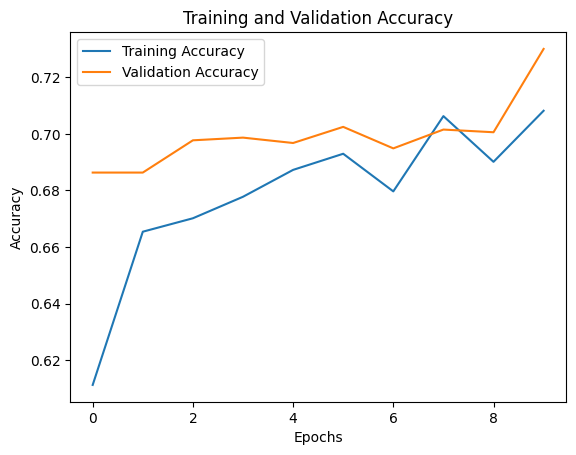

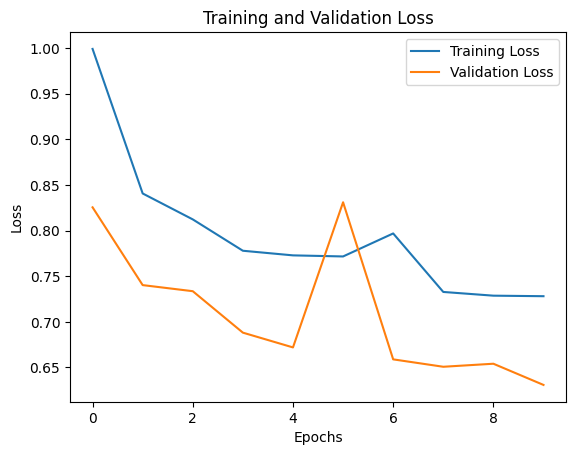

In [17]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Plot training and validation accuracy/loss
import matplotlib.pyplot as plt

# Plotting accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [18]:
# Evaluate the model's performance on the test set (or validation set if no test set is available)
test_loss, test_accuracy = model.evaluate(validation_generator)

# Output the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


33/33 ━━━━━━━━━━━━━━━━━━━━ 214s 6s/step - accuracy: 0.5586 - loss: 0.7079
Test Accuracy: 73.00%
